In [1]:
import model, dataset
from importlib import reload

from torchinfo import summary
from torch.utils.data import Dataset, DataLoader

from matplotlib import pyplot as plt

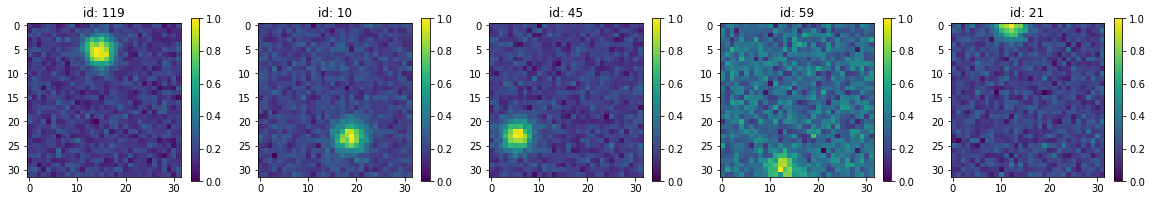

In [2]:
training_data = dataset.Gaussian2DPSFDataset(length=128, psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_psfs(training_data)

train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)

C:\Users\Kenny\anaconda3\envs\smlm-dl\lib\site-packages\torch\cuda\__init__.py:80: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 6050). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


Layer (type (var_name))                  Output Shape              Param #
EncoderModel                             --                        --
├─ModuleDict (encoders)                  --                        --
│    └─Sequential (conv_layer0)          [32, 16, 32, 32]          --
│    │    └─GroupNorm (0)                [32, 1, 32, 32]           2
│    │    └─Conv2d (1)                   [32, 16, 32, 32]          160
│    │    └─ReLU (2)                     [32, 16, 32, 32]          --
│    │    └─Conv2d (3)                   [32, 16, 32, 32]          2,320
│    │    └─ReLU (4)                     [32, 16, 32, 32]          --
│    └─MaxPool2d (pool_layer0)           [32, 16, 16, 16]          --
│    └─Dropout2d (dropout_layer0)        [32, 16, 16, 16]          --
│    └─Sequential (conv_layer1)          [32, 32, 16, 16]          --
│    │    └─GroupNorm (0)                [32, 16, 16, 16]          32
│    │    └─Conv2d (1)                   [32, 32, 16, 16]          4,640
│    │   

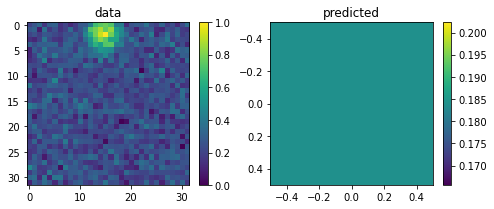

In [3]:
encoder_model = model.EncoderModel(depth=3, first_layer_out_channels=16)
print(summary(encoder_model, input_size=(32, 1, 32, 32), row_settings=["var_names"],))

model.check_model(encoder_model, train_dataloader)

Layer (type (var_name))                       Output Shape              Param #
Gaussian2DModel                               --                        --
├─Gaussian2DRenderer (renderer)               --                        --
│    └─ModuleList (params_activation)         --                        --
├─ModuleDict (encoders)                       --                        --
│    └─Sequential (conv_layer0)               [32, 16, 32, 32]          --
│    │    └─GroupNorm (0)                     [32, 1, 32, 32]           2
│    │    └─Conv2d (1)                        [32, 16, 32, 32]          160
│    │    └─ReLU (2)                          [32, 16, 32, 32]          --
│    │    └─Conv2d (3)                        [32, 16, 32, 32]          2,320
│    │    └─ReLU (4)                          [32, 16, 32, 32]          --
│    └─MaxPool2d (pool_layer0)                [32, 16, 16, 16]          --
│    └─Dropout2d (dropout_layer0)             [32, 16, 16, 16]          --
│    └─Sequential

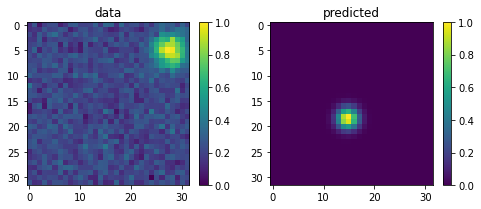

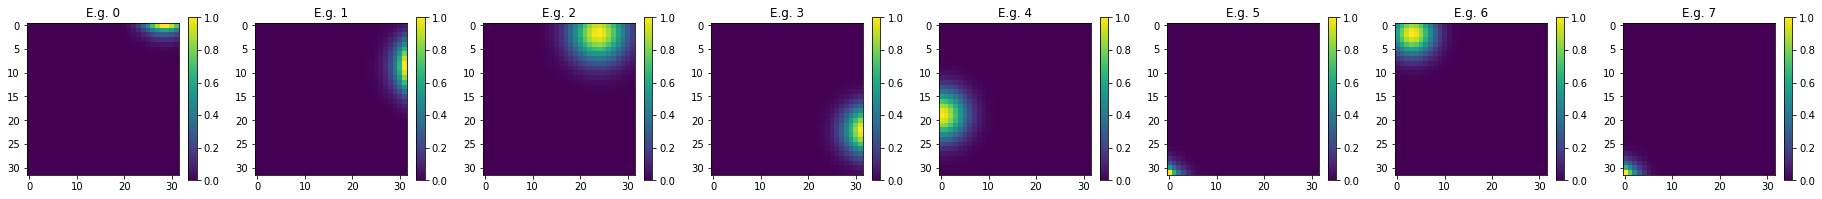

In [4]:
reload(model)

encoder_model = model.Gaussian2DModel(depth=3, first_layer_out_channels=16,)
print(summary(encoder_model, input_size=(32, 1, 32, 32), row_settings=["var_names"],))

model.check_model(encoder_model, train_dataloader)

Layer (type (var_name))                       Output Shape              Param #
Template2DModel                               --                        --
├─Template2DRenderer (renderer)               --                        --
│    └─ModuleList (params_activation)         --                        --
├─ModuleDict (encoders)                       --                        --
│    └─Sequential (conv_layer0)               [32, 16, 32, 32]          --
│    │    └─GroupNorm (0)                     [32, 1, 32, 32]           2
│    │    └─Conv2d (1)                        [32, 16, 32, 32]          160
│    │    └─ReLU (2)                          [32, 16, 32, 32]          --
│    │    └─Conv2d (3)                        [32, 16, 32, 32]          2,320
│    │    └─ReLU (4)                          [32, 16, 32, 32]          --
│    └─MaxPool2d (pool_layer0)                [32, 16, 16, 16]          --
│    └─Dropout2d (dropout_layer0)             [32, 16, 16, 16]          --
│    └─Sequential

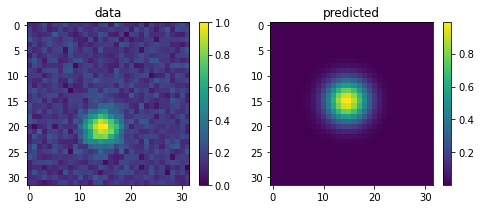

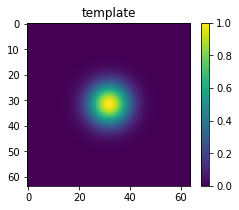

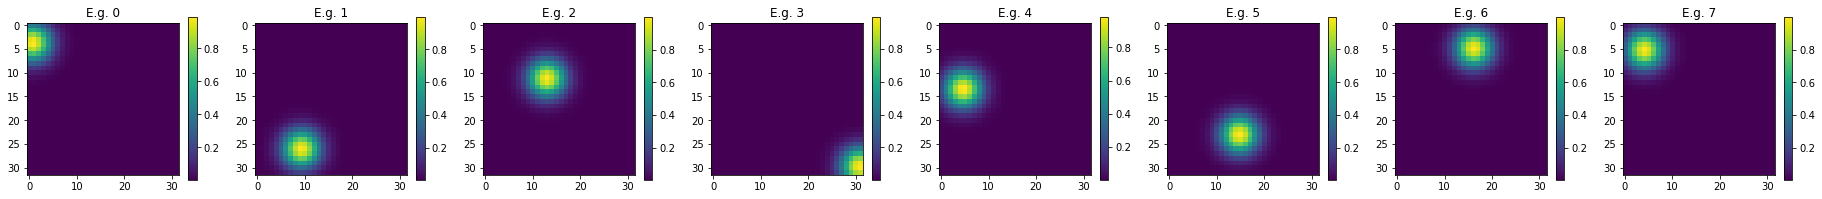

In [8]:
reload(model)

encoder_model = model.Template2DModel(depth=3, first_layer_out_channels=16,)
print(summary(encoder_model, input_size=(32, 1, 32, 32), row_settings=["var_names"],))

model.check_model(encoder_model, train_dataloader)

Layer (type (var_name))                       Output Shape              Param #
FourierOptics2DModel                          --                        --
├─FourierOptics2DRenderer (renderer)          --                        --
│    └─ModuleList (params_activation)         --                        --
├─ModuleDict (encoders)                       --                        --
│    └─Sequential (conv_layer0)               [32, 16, 32, 32]          --
│    │    └─GroupNorm (0)                     [32, 1, 32, 32]           2
│    │    └─Conv2d (1)                        [32, 16, 32, 32]          160
│    │    └─ReLU (2)                          [32, 16, 32, 32]          --
│    │    └─Conv2d (3)                        [32, 16, 32, 32]          2,320
│    │    └─ReLU (4)                          [32, 16, 32, 32]          --
│    └─MaxPool2d (pool_layer0)                [32, 16, 16, 16]          --
│    └─Dropout2d (dropout_layer0)             [32, 16, 16, 16]          --
│    └─Sequential

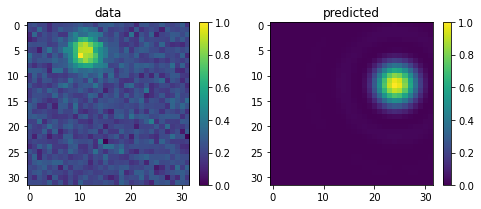

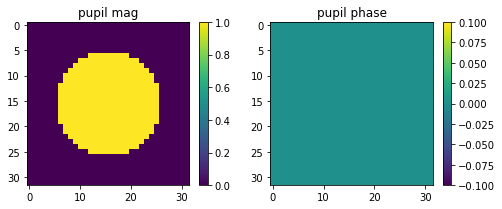

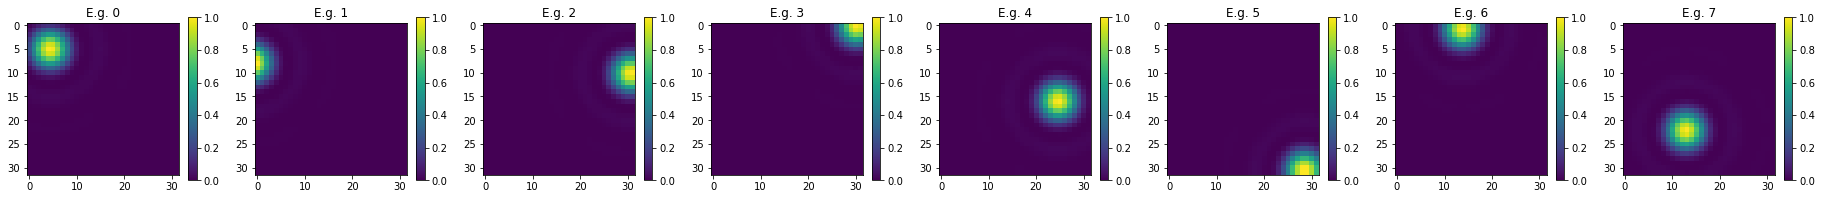

In [9]:
reload(model)

encoder_model = model.FourierOptics2DModel(depth=3, first_layer_out_channels=16,)
print(summary(encoder_model, input_size=(32, 1, 32, 32), row_settings=["var_names"],))

model.check_model(encoder_model, train_dataloader)